# Jitter & Shimmer를 이용한 clustering

In [3]:
import os
import numpy as np
import parselmouth
from parselmouth.praat import call

# Audio Feature extraction

In [4]:
# feature extraction function
def feature_extract(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID)
    duration = call(sound, "Get total duration") # get duration
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) # create praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0, 0, unit) # get standard deviation
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3) # local jitter (%)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3) # local absolute jitter (s)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3) # rap jitter
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3) # ppq5 jitter 
    localShimmer = call([sound, pointProcess], 'Get shimmer (local)', 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], 'Get shimmer (local_dB)', 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer = call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, f0min, 0.1, 4.5)
    hnr = call(harmonicity, "Get mean", 0, 0)
    
    # to percent
    localJitter *= 100. 
    rapJitter *= 100.
    ppq5Jitter *= 100.
    localShimmer *= 100.
    apq11Shimmer *= 100.
    
    return duration, meanF0, stdevF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr

In [5]:
# feature extract example
src = 'train_data/mild/1/chapter1.wav'
src = 'C:/Users/jae/Music/hearing_loss_split/mild/7/chapter1.wav'
sound = parselmouth.Sound(src)
A = feature_extract(sound, 75, 1000, "Hertz")

In [44]:
# extract features from the source files
def feature_from_file(main_dir, f0min = 75, f0max = 1000, unit = "Hertz"):
    chap1 = []
    chap2 = []
    chap3 = []
    dirs = os.listdir(main_dir)
    for dir in dirs:
        files = os.listdir(os.path.join(main_dir, dir))
        for i in range(len(files)):
            if "chapter1.wav" == files[i].lower():
                duration, meanF0, stdevF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr \
                    = feature_extract(os.path.join(main_dir, dir, files[i]), f0min, f0max, unit)
                if np.any(np.isnan([meanF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr])): continue
                chap1.append([meanF0, localJitter, localabsoluteJitter, 
                              rapJitter, ppq5Jitter, localShimmer, 
                              localdbShimmer, apq11Shimmer, hnr])
            elif "chapter2.wav" == files[i].lower():
                duration, meanF0, stdevF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr \
                    = feature_extract(os.path.join(main_dir, dir, files[i]), f0min, f0max, unit)
                if np.any(np.isnan([meanF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr])): continue
                chap2.append([meanF0, localJitter, localabsoluteJitter, 
                              rapJitter, ppq5Jitter, localShimmer, 
                              localdbShimmer, apq11Shimmer, hnr])
            elif "chapter3.wav" == files[i].lower():
                duration, meanF0, stdevF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr \
                    = feature_extract(os.path.join(main_dir, dir, files[i]), f0min, f0max, unit)
                if np.any(np.isnan([meanF0, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, localShimmer, localdbShimmer, apq11Shimmer, hnr])): continue
                chap3.append([meanF0, localJitter, localabsoluteJitter, 
                              rapJitter, ppq5Jitter, localShimmer, 
                              localdbShimmer, apq11Shimmer, hnr])
    return chap1, chap2, chap3

In [45]:
# extracting normal, mild, severe features
# 0: meanF0, 1: localJitter, 2: localabsoluteJitter, 3: rapJitter, 4: ppq5Jitter
# 5: localShimmer,  6: localdbShimmer, 7: apq11Shimmer, 8: hnr
normal_dir = 'train_data/normal'
mild_dir = 'train_data/mild'
severe_dir = 'train_data/severe'

normal_chap1, normal_chap2, normal_chap3 = feature_from_file(normal_dir)
mild_chap1, mild_chap2, mild_chap3 = feature_from_file(mild_dir)
severe_chap1, severe_chap2, severe_chap3 = feature_from_file(severe_dir)

normal_chap1, normal_chap2, normal_chap3 = np.array(normal_chap1), np.array(normal_chap2), np.array(normal_chap3)
mild_chap1, mild_chap2, mild_chap3 = np.array(mild_chap1), np.array(mild_chap2), np.array(mild_chap3)
severe_chap1, severe_chap2, severe_chap3 = np.array(severe_chap1), np.array(severe_chap2), np.array(severe_chap3)

# Feature plot

C:\Users\jae\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jae\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jae\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:>

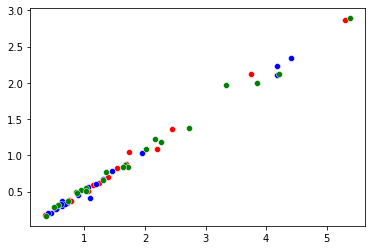

In [30]:
# scatter plot normal, mild, severe
import seaborn as sns

X1, Y1 = normal_chap1[:, 1], normal_chap1[:, 3]
X2, Y2 = mild_chap1[:, 1], mild_chap1[:, 3]
X3, Y3 = severe_chap1[:, 1], severe_chap1[:, 3]

sns.scatterplot(X1, Y1, color='red', x="localJitter", y="rapJitter")
sns.scatterplot(X2, Y2, color='blue', x="localJitter", y="rapJitter")
sns.scatterplot(X3, Y3, color='green', x="localJitter", y="rapJitter")

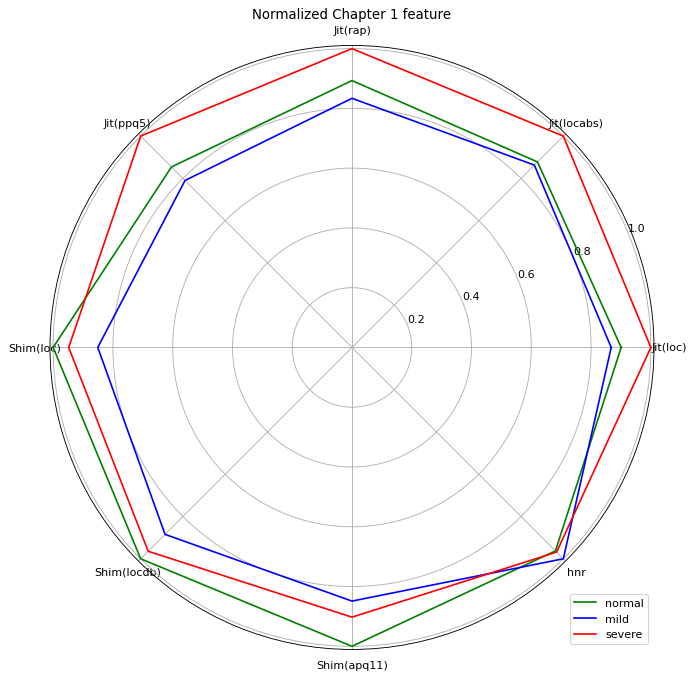

In [31]:
# circular bar plot average Jitter & Shimmer normal, mild, severe
import matplotlib.pyplot as plt

normal_avg = np.nanmean(normal_chap3, axis=0)[1:]
mild_avg = np.nanmean(mild_chap3, axis=0)[1:]
severe_avg = np.nanmean(severe_chap3, axis=0)[1:]

theta = np.linspace(0, 2*np.pi, len(normal_avg)+1) 

# for normalizing
A = np.array([normal_avg, mild_avg, severe_avg])
for i in range(len(normal_avg)):
    max = 0
    for j in range(3):
        max = A[j][i] if A[j][i] > max else max
    A[:,i] /= max

normalized_normal_avg = A[0,:]
normalized_mild_avg = A[1,:]
normalzied_severe_avg = A[2,:]
# for clean graph
normalized_normal_avg = np.append(normalized_normal_avg, normalized_normal_avg[0])
normalized_mild_avg = np.append(normalized_mild_avg, normalized_mild_avg[0])
normalzied_severe_avg = np.append(normalzied_severe_avg, normalzied_severe_avg[0])

"""
meanF0, localJitter, localabsoluteJitter, 
rapJitter, ppq5Jitter, localShimmer, 
localdbShimmer, apq11Shimmer, hnr
"""


plt.figure(figsize=(10,10), dpi=80)
ax = plt.subplot(111, polar=True)
ax.set_title("Normalized Chapter 1 feature")
label_position = ax.get_rlabel_position()
#ax.text(np.radians(label_position-10), ax.get_rmax()/2., "meanF0", rotation=label_position, ha='center', va='center')
plt.thetagrids(theta[:-1]/(2*np.pi)*360, ('Jit(loc)', 'Jit(locabs)','Jit(rap)', 'Jit(ppq5)',
                            'Shim(loc)','Shim(locdb)', 'Shim(apq11)', 'hnr') )
plt.polar(theta, normalized_normal_avg, c='green', label='normal')
plt.polar(theta, normalized_mild_avg, c='blue', label='mild')
plt.polar(theta, normalzied_severe_avg, c='red', label='severe')
ax.legend(loc='lower right')
#plt.savefig('Chapter 3 feature.png')

# Clustering

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

X = np.concatenate((normal_chap1, mild_chap1, severe_chap1), axis=0)
cluster_df = pd.DataFrame(data=X, columns=['meanF0', 'localJitter', 'localabsoluteJitter', 
                                         'rapJitter', 'ppq5Jitter', 'localShimmer', 
                                          'localdbShimmer', 'apq11Shimmer', 'hnr'])
Y = np.empty(len(X))

for i in range(len(Y)):
    if i < len(normal_chap1): Y[i] = 0
    elif i < len(normal_chap1) + len(mild_chap1): Y[i] = 1
    else: Y[i] = 2
cluster_df['target'] = Y

cluster_df.head()

# Use K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=2022)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels
print(cluster_df.groupby('target')['kmeans_cluster'].value_counts())

# Use Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=2022)
gmm_labels = gmm.fit_predict(X)
cluster_df['gmm_cluster'] = gmm_labels
print(cluster_df.groupby('target')['gmm_cluster'].value_counts())

target  kmeans_cluster
0.0     0                 12
        2                  4
        1                  1
1.0     0                 14
        2                  4
        1                  1
2.0     0                 12
        2                  8
        1                  1
Name: kmeans_cluster, dtype: int64
target  gmm_cluster
0.0     0              14
        2               2
        1               1
1.0     0              13
        2               5
        1               1
2.0     0              14
        2               6
        1               1
Name: gmm_cluster, dtype: int64
